In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv", parse_dates=['publishedAt', 'trending_date'])
df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12 00:00:00+00:00,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12 00:00:00+00:00,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...


In [3]:
df.shape

(81448, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81448 entries, 0 to 81447
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           81448 non-null  object             
 1   title              81448 non-null  object             
 2   publishedAt        81448 non-null  datetime64[ns, UTC]
 3   channelId          81448 non-null  object             
 4   channelTitle       81447 non-null  object             
 5   categoryId         81448 non-null  int64              
 6   trending_date      81448 non-null  datetime64[ns, UTC]
 7   tags               81448 non-null  object             
 8   view_count         81448 non-null  int64              
 9   likes              81448 non-null  int64              
 10  dislikes           81448 non-null  int64              
 11  comment_count      81448 non-null  int64              
 12  thumbnail_link     81448 non-null  object     

In [5]:
df.isna().sum().sum()

2246

In [6]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            1
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          2245
dtype: int64

In [7]:
df.loc[df.channelTitle.isna()] ## channel title --> Juvis Productions (from channel id)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
30289,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21 12:30:29+00:00,UCDQt0y-FCJLRdwhNLutPFZA,NaN,22,2021-01-23 00:00:00+00:00,Kala|Kala trailer|kala teaser|kala tovino thom...,1008638,72772,1451,3023,https://i.ytimg.com/vi/9b9MovPPewk/default.jpg,False,False,Presenting Official Trailer Of Kala Directed B...


In [8]:
df.channelTitle.fillna('Juvis Productions', inplace=True)

In [9]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          2245
dtype: int64

In [10]:
mask = (df.view_count<=0)
df = df.loc[~mask]

- **Time Period of data**

In [11]:
## Start time

df.publishedAt.min()

Timestamp('2020-07-23 11:30:37+0000', tz='UTC')

In [12]:
## End time 

df.publishedAt.max()

Timestamp('2021-10-14 05:05:11+0000', tz='UTC')

### Adding Time Features

In [13]:
df.rename(columns={'trending_date':'trendingAt'}, inplace=True)

In [14]:
df.insert(loc=3, column='published_date', value=df.publishedAt.dt.date)
df.insert(loc=4, column='published_month', value=df.publishedAt.dt.month_name())
df.insert(loc=5, column='published_day', value=df.publishedAt.dt.day_name())

df.insert(loc=10, column='trending_date', value=df.trendingAt.dt.date)
df.insert(loc=11, column='trending_month', value=df.trendingAt.dt.month_name())
df.insert(loc=12, column='trending_day', value=df.trendingAt.dt.day_name())

In [15]:
df.head(3)

,video_id,title,publishedAt,published_date,published_month,published_day,channelId,channelTitle,categoryId,trendingAt,...,trending_day,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,2020-08-12,August,Wednesday,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12 00:00:00+00:00,...,Wednesday,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,2020-08-11,August,Tuesday,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12 00:00:00+00:00,...,Wednesday,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,2020-08-11,August,Tuesday,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,...,Wednesday,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...


In [16]:
df.published_date = df.published_date.astype(np.datetime64)
df.trending_date = df.trending_date.astype(np.datetime64)

### Most unique titles in a day on trending page.

In [17]:
date_group = df.groupby('published_date')['title'].unique().to_frame()
date_group['total_unique'] = date_group.title.transform(lambda x: len(x))
date_group = date_group.sort_values(by='total_unique', ascending=False)

date_group.head(10)

,title,total_unique
published_date,,
2021-09-24,[Coldplay X BTS - My Universe (Official Lyric ...,88
2021-09-12,"[Piyush Ko Dar Nahi Lagta 😲, MoVlogs & Lana Ro...",86
2020-10-15,[Bigg Boss Tamil Season 4 | 15th October 2020...,80
2021-10-05,"[Dhindora | Official Trailer | BB Ki Vines, Do...",80
2021-04-13,[Akhanda | #BB3 Title Roar | Nandamuri Balakri...,79
2021-09-30,[Coka Cola Challenge 🍹~ Who Drinks First would...,78
2021-05-07,"[BATTLEGROUNDS MOBILE INDIA - Logo Reveal, Bac...",77
2021-09-05,[Children's Day in Japan🇯🇵 Vs America 🇺🇸 Vs In...,77
2020-11-26,[Woh Chaand Kahan Se Laogi (Official Video) Vi...,76


In [18]:
date_group.tail()

,title,total_unique
published_date,,
2021-05-24,"[Pretended that the children did it😂 #shorts, ...",8
2021-10-14,"[OFFROADING With New Thar 😍, I BUILT A HOUSE A...",6
2020-08-05,[Pandu Performance | Dhee Champions | 5th Augu...,4
2020-08-03,[DOCTOR (Official Video) Sidhu Moose Wala | Ki...,1
2020-07-23,[Little Voice — Official Trailer | Apple TV+],1


In [19]:
xticks = date_group.index.astype(np.object)[:10].to_list()
xticks = [d.strftime("%Y-%m-%d") for d in xticks]
# xticks

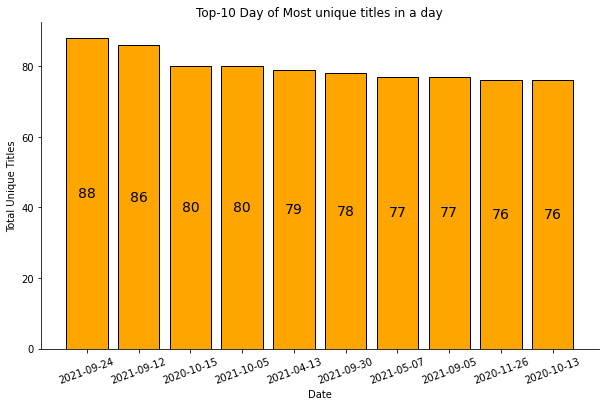

In [20]:
def plot_barplot(x, y, 
                 xticks=None, 
                 yticks=None, 
                 xlabel=None, 
                 ylabel=None, 
                 title=None, 
                 figsize=(10,6), 
                 barh=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if barh:
        g = plt.barh(y=y, width=x, color='orange', ec='k')
        plt.yticks(ticks=y, labels=yticks)
        
        for rect in g.get_children():
            h = rect.get_height()
            w = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            plt.annotate(f"{w}", (w/2, y+h/2), va='center', fontsize=14)
    else:
        g = plt.bar(x=x, height=y, color='orange', ec='k')
        plt.xticks(ticks=x, labels=xticks, rotation=20)

        for rect in g.get_children():
            h = rect.get_height()
            w = rect.get_width()
            x = rect.get_x()
            plt.annotate(f"{h}", (x+w/2, h/2), horizontalalignment='center', va='center', fontsize=14)

    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

    
plot_barplot(np.arange(10), date_group.total_unique[:10], xticks=xticks, xlabel="Date", 
             ylabel="Total Unique Titles", 
             title="Top-10 Day of Most unique titles in a day")

### Top-10 channels On Trending Page

In [21]:
channels_df = (df.groupby(['channelTitle'])['channelTitle']
               .agg('count')
               .to_frame()
               .rename(columns={'channelTitle':'total'}))

channels_df = channels_df.sort_values(by='total', ascending=False)
channels_df.head()

,total
channelTitle,
Vijay Television,1184
Colors TV,1059
ZEE5,928
Asianet,801
Sony SAB,717


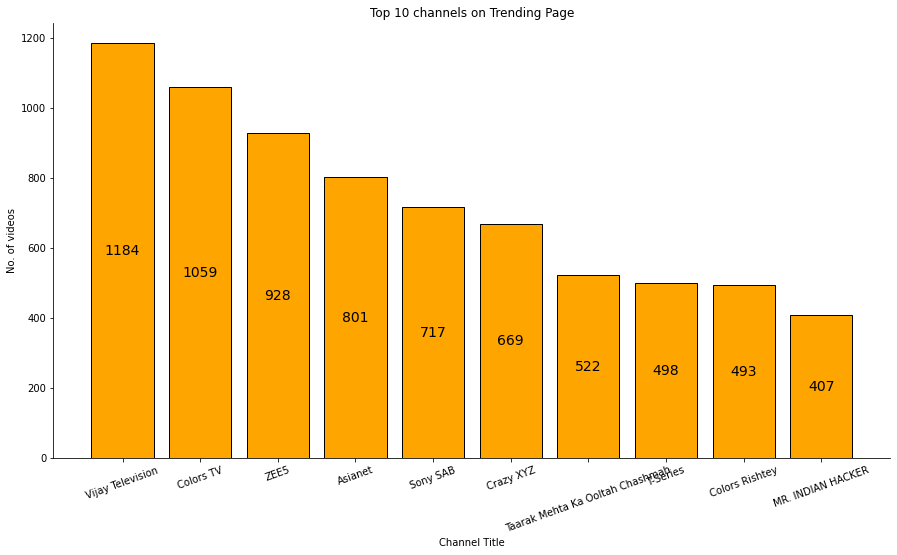

In [22]:
plot_barplot(channels_df.index[:10], channels_df.total[:10], 
             xlabel="Channel Title",
             ylabel="No. of videos", 
             title="Top 10 channels on Trending Page", 
             figsize=(15,8))

## Top Video Categories On Trending Page

In [23]:
df.categoryId.value_counts(normalize=True)

24    0.409377
10    0.165074
22    0.117712
23    0.079265
28    0.038312
25    0.035537
17    0.035070
26    0.034616
20    0.031718
27    0.020912
1     0.019917
19    0.005956
2     0.005771
29    0.000503
15    0.000258
Name: categoryId, dtype: float64

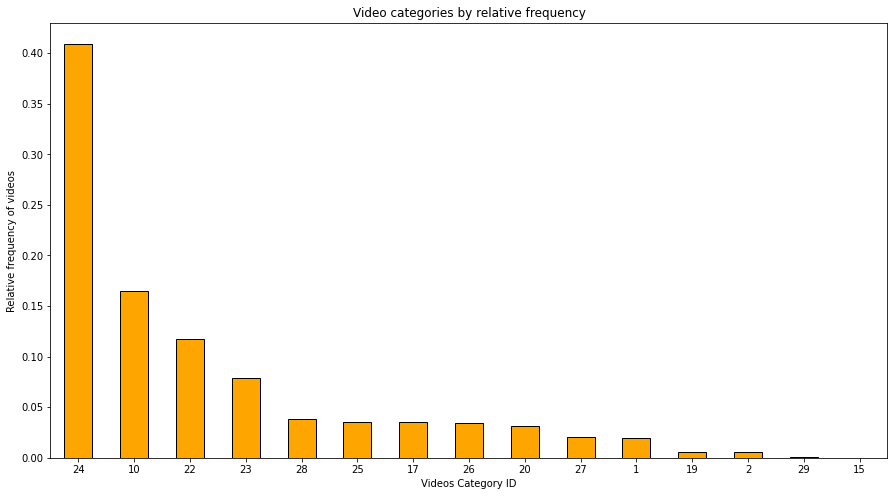

In [24]:
df.categoryId.value_counts(normalize=True).plot.bar(figsize=(15, 8), rot=0, color='orange', ec='k')
plt.xlabel("Videos Category ID")
plt.ylabel("Relative frequency of videos")
plt.title("Video categories by relative frequency")
plt.show()

### Total videos same day on Trending Page

In [25]:
#group titles by their published date and minimum trending date

time_df = df.groupby("title")[['published_date', 'trending_date']].agg('min')

## add time column by differencing trending datetime and published datetime
time_df['time'] = time_df['trending_date'] - time_df['published_date']

# convert time to seconds
time_df.time = time_df.time.dt.days

# sort df by time column
time_df = time_df.sort_values(by='time')

time_df.head()

,published_date,trending_date,time
title,,,
South Delhi Girl ko hue saas ki problem 😟😟Girl Safety in Ladakh,2021-07-23,2021-07-23,0
Bigg Boss Tamil Season 4 | 18th December 2020 - Promo 2,2020-12-18,2020-12-18,0
Piyush Broke @Triggered Insaan's Nose 😲,2021-03-16,2021-03-16,0
India lower order frustrates Aussies with Test evenly poised | Vodafone Test Series 2020-21,2021-01-17,2021-01-17,0
Piyush And Oreo playing football 😃,2021-09-27,2021-09-27,0


In [26]:
same_day_df = time_df[time_df.time==0]

print("Total videos on same day trending page are", len(same_day_df))

Total videos on same day trending page are 4265


### Channel and Category with the most trending videos on the same day

In [27]:
# select only same day trending video titles
full_sd_df = df.loc[df.title.isin(same_day_df.index.to_list())]

# Unique titles in each channel
full_sd_df = full_sd_df.groupby('channelTitle')['title'].unique().to_frame()

# add column with total number to unique titles on same day
full_sd_df['counts_unique'] = full_sd_df.title.transform(lambda x: len(x))

# sort dataframe by 'count_unique'
full_sd_df = full_sd_df.sort_values(by='counts_unique', ascending=False)

full_sd_df.head()

,title,counts_unique
channelTitle,,
Vijay Television,[Barathi Kannamma | 13th to 14th August 2020 -...,200
Asianet,[സ്വന്തം അച്ഛന്റെ ചതി അറിഞ്ഞ് വിങ്ങിപ്പൊട്ടി പ...,182
Colors TV,"[Naagin 5 | नागिन 5 | Ep. 01 & 02 | Recap, Sha...",84
T-Series,[TEASER: Pachtaoge (Female Version) |Nora Fate...,61
RJ Raunac No-Po,[Gunjan Saxena movie से Indian Airforce नाराज़...,52


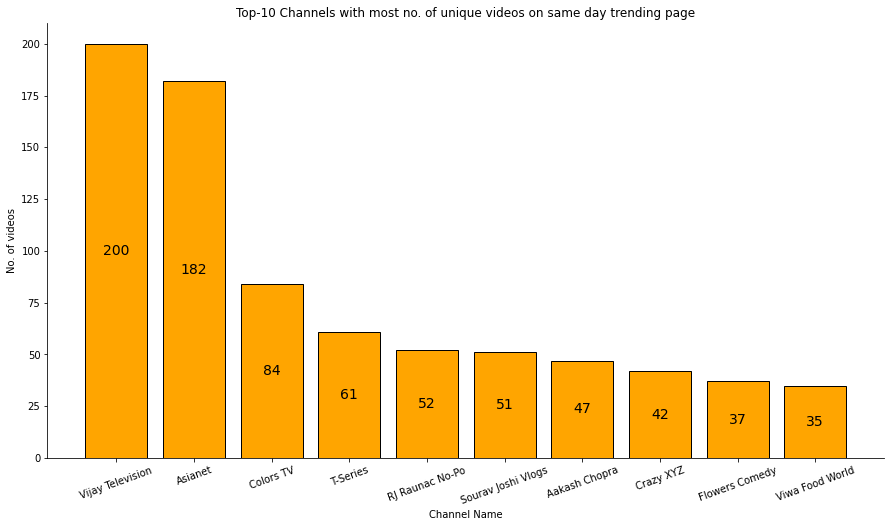

In [28]:
plot_barplot(x=np.arange(10), y=full_sd_df.counts_unique[:10], 
             xticks=full_sd_df.index[:10],
             xlabel="Channel Name", ylabel="No. of videos", 
             title="Top-10 Channels with most no. of unique videos on same day trending page",
             figsize=(15,8))

In [29]:
full_sd_df = df.loc[df.title.isin(same_day_df.index.to_list())]

full_sd_df = full_sd_df.groupby('categoryId')['title'].unique().to_frame()
full_sd_df['counts_unique'] = full_sd_df.title.transform(lambda x: len(x))

full_sd_df = full_sd_df.sort_values(by='counts_unique', ascending=False)

full_sd_df.head()

,title,counts_unique
categoryId,,
24,[Sadak 2 | Official Trailer | Sanjay | Pooja |...,1691
10,[Jatti Jaandi (Official Video) | Kambi Ft. Mah...,1007
22,[We got LOST in CLOUDS | LONAVALA vlog series...,398
20,"[SISTER DOES MY HAIRCUT, Suicide Squad: Kill t...",216
17,"[IPL 2020: It is back!, 12 Years of Virat: Rel...",182


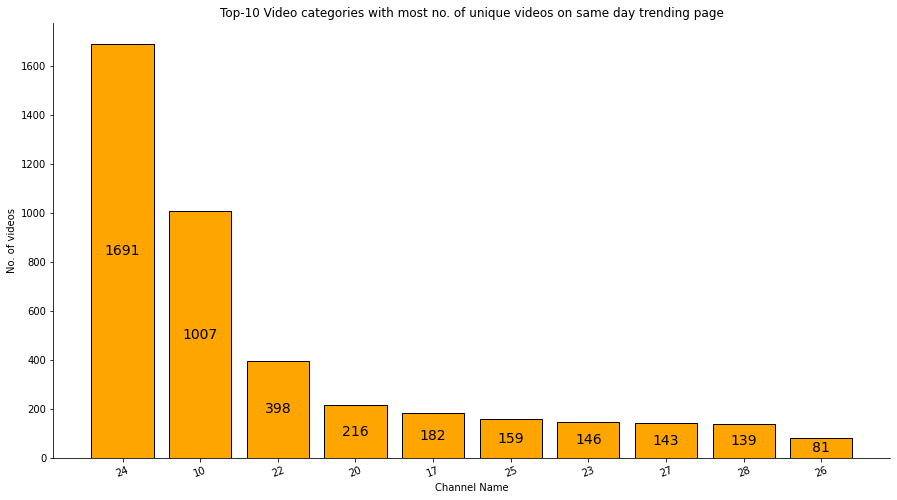

In [30]:
plot_barplot(x=np.arange(10), 
             y=full_sd_df.counts_unique[:10], 
             xticks=full_sd_df.index[:10],
             xlabel="Channel Name", 
             ylabel="No. of videos", 
             title="Top-10 Video categories with most no. of unique videos on same day trending page",
             figsize=(15,8))

### Longest Time to came on trending page

In [31]:
## Longest time to came on trending page

time_df.tail(5)

,published_date,trending_date,time
title,,,
Schedule your SMS with Truecaller,2020-08-06,2020-08-28,22
2021 rangoli design | 12 చుక్కల న్యూ ఇయర్ ముగ్గు | సీతకోక చిలుక ముగ్గు | new year kolam,2020-12-09,2021-01-01,23
How to setup Call Reasons on Truecaller,2021-02-25,2021-03-20,23
Diego Maradona’s Top 5 Goals | FIFA World Cup,2020-10-29,2020-11-26,28
Maddam Sir - Ep 141 - Full Episode - 24th December 2020,2020-12-26,2021-01-25,30


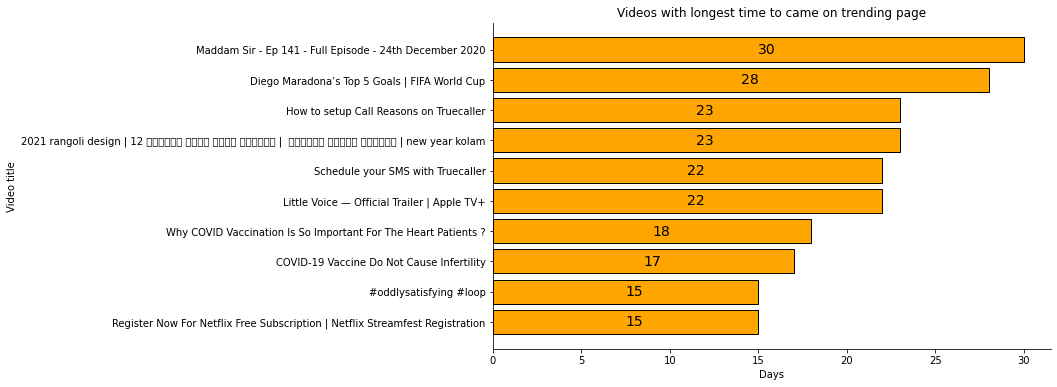

In [32]:
plot_barplot(x=time_df.time[-10:],
             y=np.arange(10), yticks=time_df.index[-10:],
             xlabel="Days", ylabel="Video title",
             title="Videos with longest time to came on trending page",
             barh=True)

### Videos that stayed for max number of days on trending Page

In [33]:
## LOGIC: A video can be on trending page from its' start on trending page to alternate day or regular day, or skipping many days.
## So, we cannot just calucalte the difference of first trending day and last trending day
## we need to calculate each day, the video was actually on trending

days_df = df.groupby('title')['trendingAt'].unique().to_frame()

days_df['days'] = days_df.trendingAt.transform(lambda x: len(x))

days_df = days_df.sort_values(by='days', ascending=False)

days_df.head()

,trendingAt,days
title,,
"Kundali Bhagya | कुंडली भाग्य | Monday - Friday, 9:30 PM | Promo | Zee TV","[2020-09-02 00:00:00+00:00, 2020-09-03 00:00:0...",37
मन की आवाज़ - प्रतिज्ञा 2,"[2021-03-06 00:00:00+00:00, 2021-03-07 00:00:0...",22
Kumkum Bhagya,"[2021-06-21 00:00:00+00:00, 2021-06-22 00:00:0...",21
"Kundali Bhagya - कुंडली भाग्य - Monday to Friday, 9:30 PM - Promo | Zee TV","[2021-04-02 00:00:00+00:00, 2021-04-03 00:00:0...",20
Kundali Bhagya,"[2021-06-24 00:00:00+00:00, 2021-06-25 00:00:0...",19


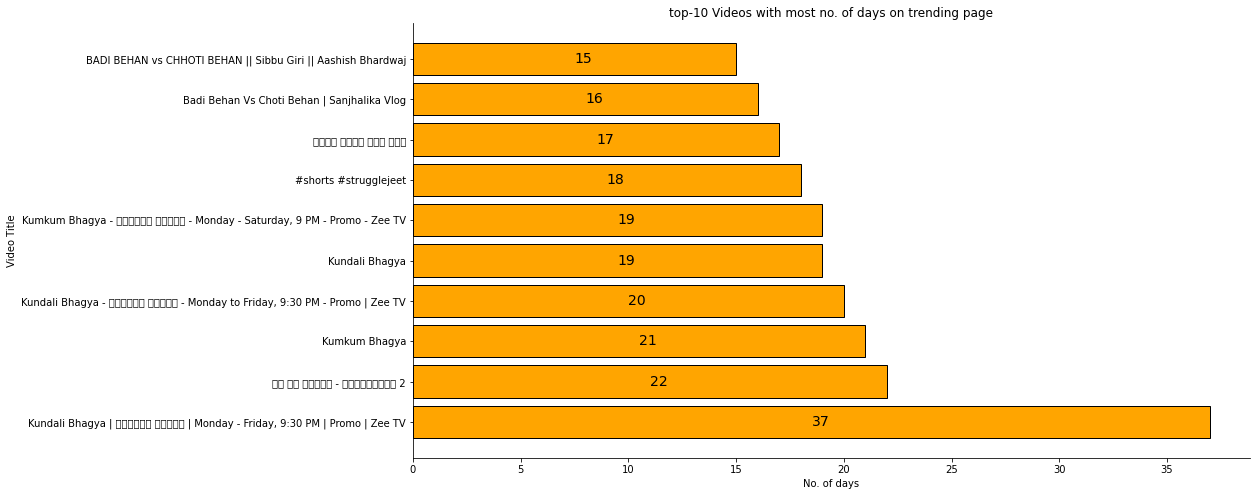

In [34]:
plot_barplot(x=days_df.days[:10], 
             y=np.arange(10), 
             yticks=days_df.index[:10],
             ylabel="Video Title", 
             xlabel="No. of days", 
             title="top-10 Videos with most no. of days on trending page",
             figsize=(15,8), barh=True)

### Most Viewed, liked and Disliked Videos on Trending Page

In [35]:
sub_df = df.groupby('title')[['view_count', 'likes', 'dislikes','comment_count']].max()
sub_df.head()

,view_count,likes,dislikes,comment_count
title,,,,
20 WEDS 30 | EP1 | Mini Web Series | Comedy | Ponmutta (With English subtitles),509727,16701,506,738
20 WEDS 30 | EP1 | Mini Web Series | Ponmutta (With English subtitles),469751,14511,427,683
20 WEDS 30 | Episode 2 | Mini Web Series | Comedy | Ponmutta (With English subtitles),592280,37411,746,669
#12 | SURPRISED MY SISTER ON HER BIRTHDAY | VIBE WITH SANGWAN,119292,24290,121,399
#13 | ARE YOU SMARTER THAN THIS ADORABLE 4 YEAR OLD GIRL? | VIBE WITH SANGWAN,133762,22160,108,304


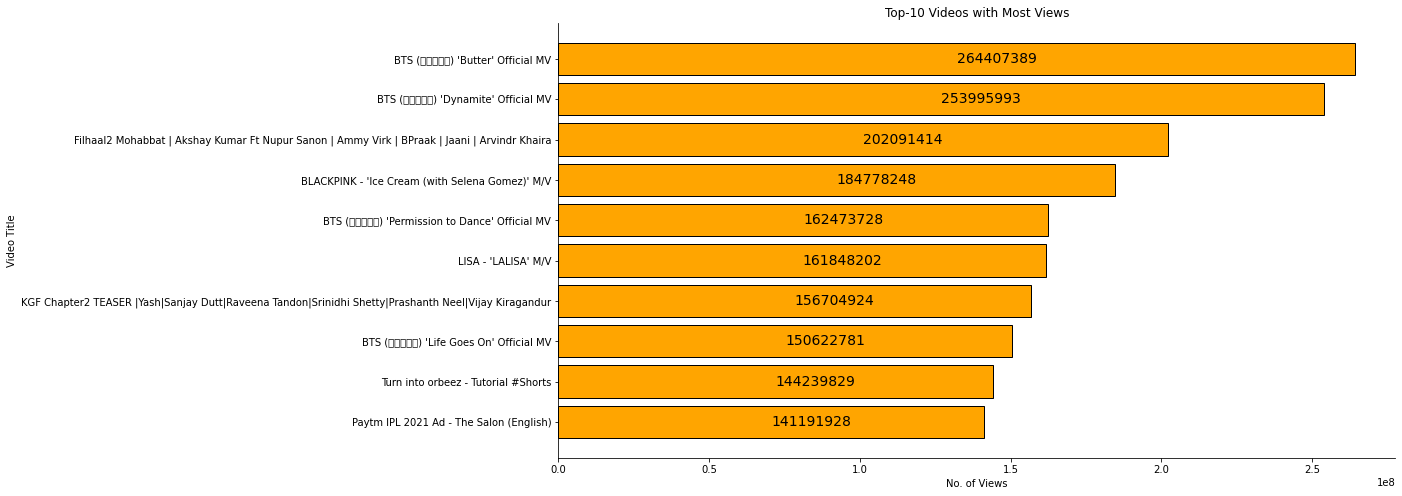

In [36]:
g = sub_df.view_count.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Views", 
             title="Top-10 Videos with Most Views",
             figsize=(15,8), barh=True)

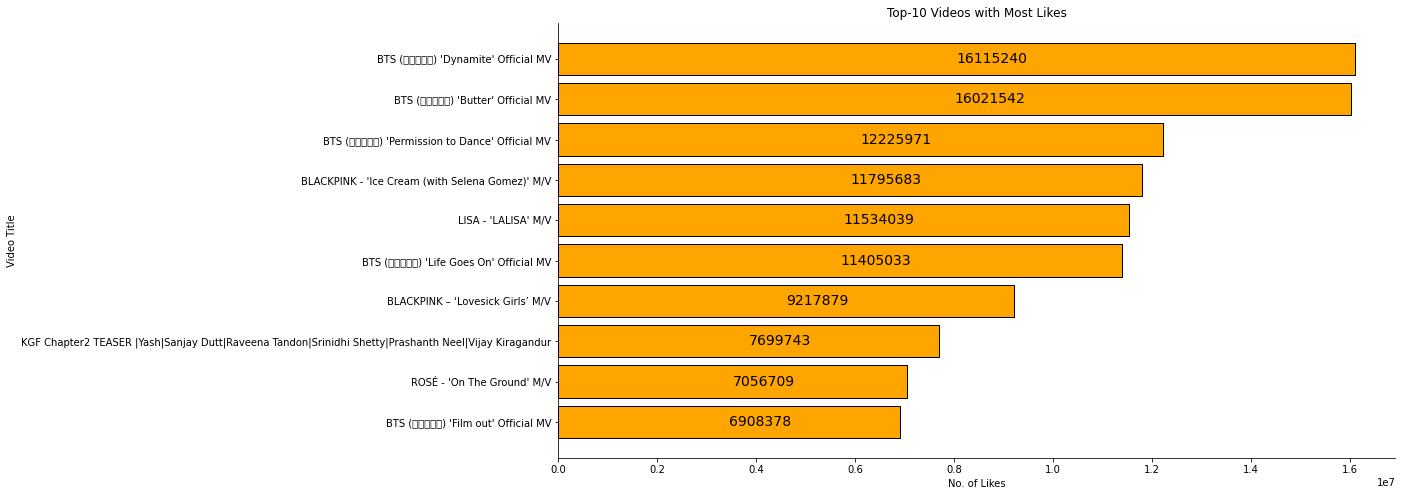

In [37]:
g = sub_df.likes.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Likes", 
             title="Top-10 Videos with Most Likes",
             figsize=(15,8), barh=True)

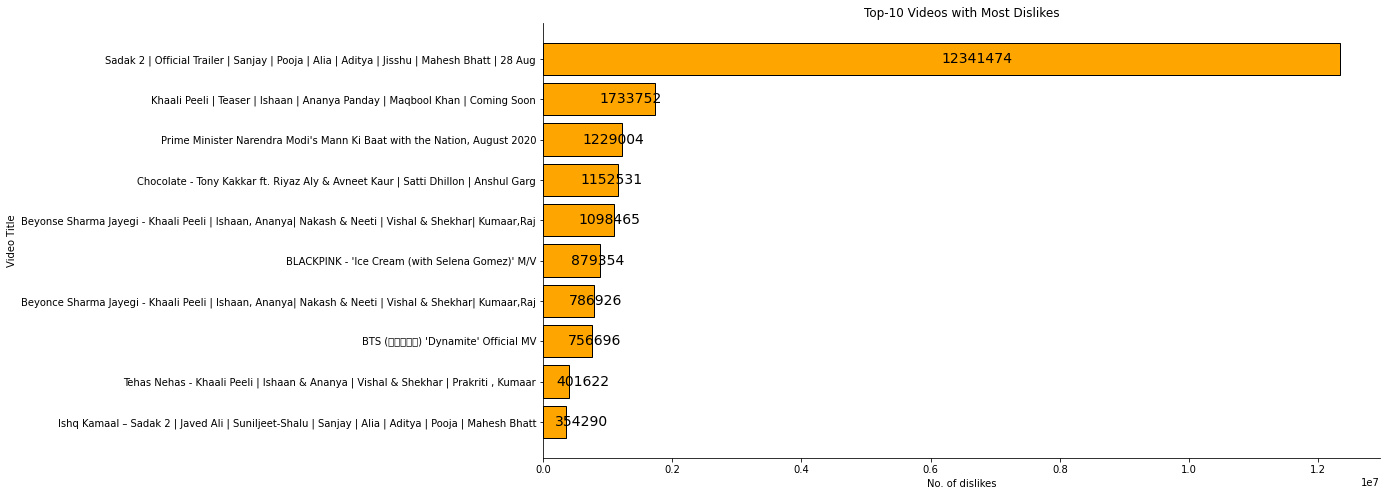

In [38]:
g = sub_df.dislikes.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of dislikes", 
             title="Top-10 Videos with Most Dislikes",
             figsize=(15,8), barh=True)

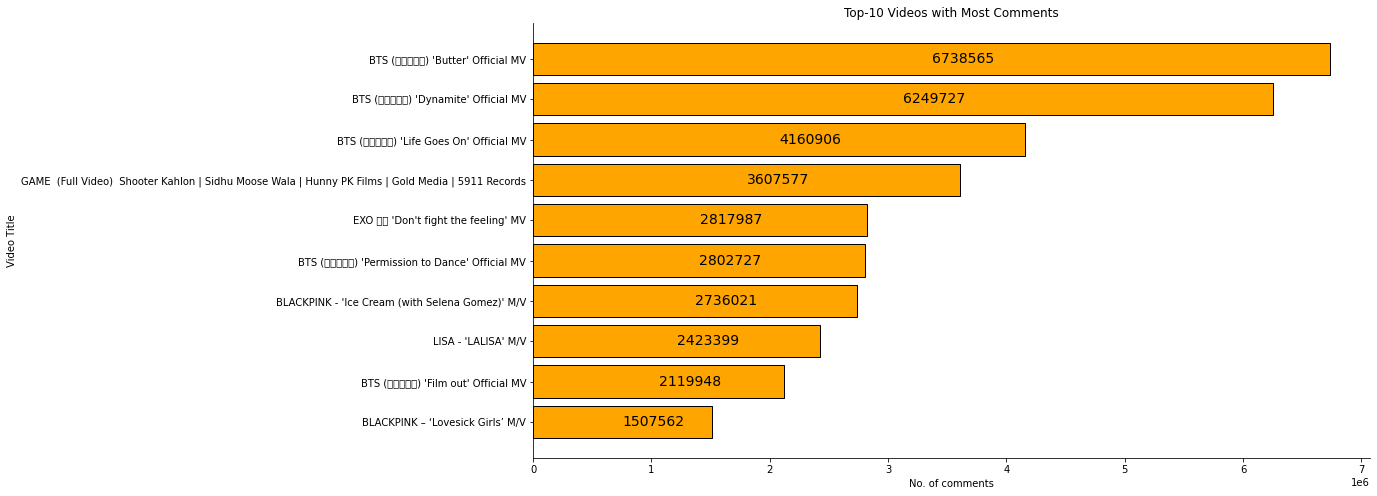

In [39]:
g = sub_df.comment_count.sort_values(ascending=False)[:10].sort_values()

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments", 
             title="Top-10 Videos with Most Comments",
             figsize=(15,8), barh=True)

### Min Viewed, liked and Disliked Videos on Trending Page

In [40]:
min_df = df.groupby('title')[['view_count', 'likes', 'dislikes','comment_count']].min()
min_df.head()

,view_count,likes,dislikes,comment_count
title,,,,
20 WEDS 30 | EP1 | Mini Web Series | Comedy | Ponmutta (With English subtitles),509727,16701,506,738
20 WEDS 30 | EP1 | Mini Web Series | Ponmutta (With English subtitles),132193,11145,308,574
20 WEDS 30 | Episode 2 | Mini Web Series | Comedy | Ponmutta (With English subtitles),325609,25871,496,508
#12 | SURPRISED MY SISTER ON HER BIRTHDAY | VIBE WITH SANGWAN,81803,19068,87,330
#13 | ARE YOU SMARTER THAN THIS ADORABLE 4 YEAR OLD GIRL? | VIBE WITH SANGWAN,93655,17780,71,259


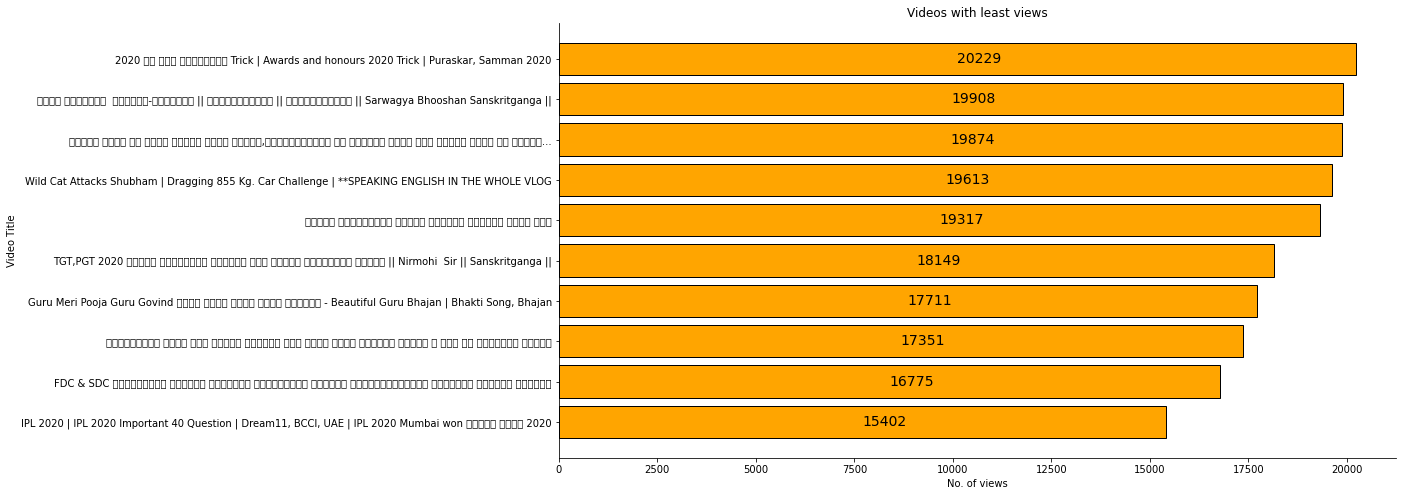

In [41]:
g = min_df.view_count.sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of views", 
             title="Videos with least views",
             figsize=(15,8), barh=True)

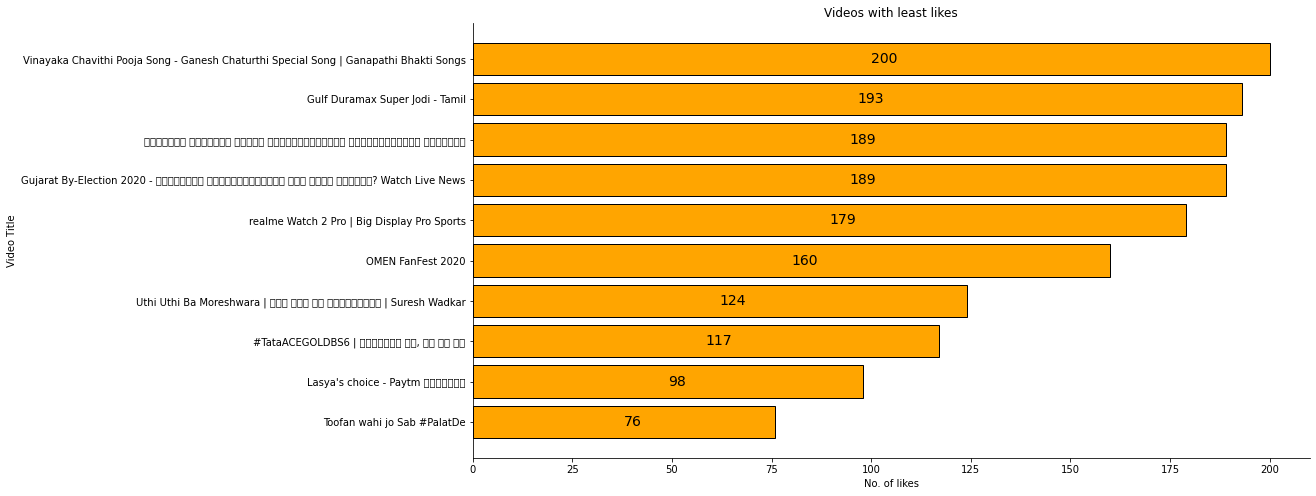

In [42]:
g = min_df.likes[min_df.likes>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of likes", 
             title="Videos with least likes",
             figsize=(15,8), barh=True)

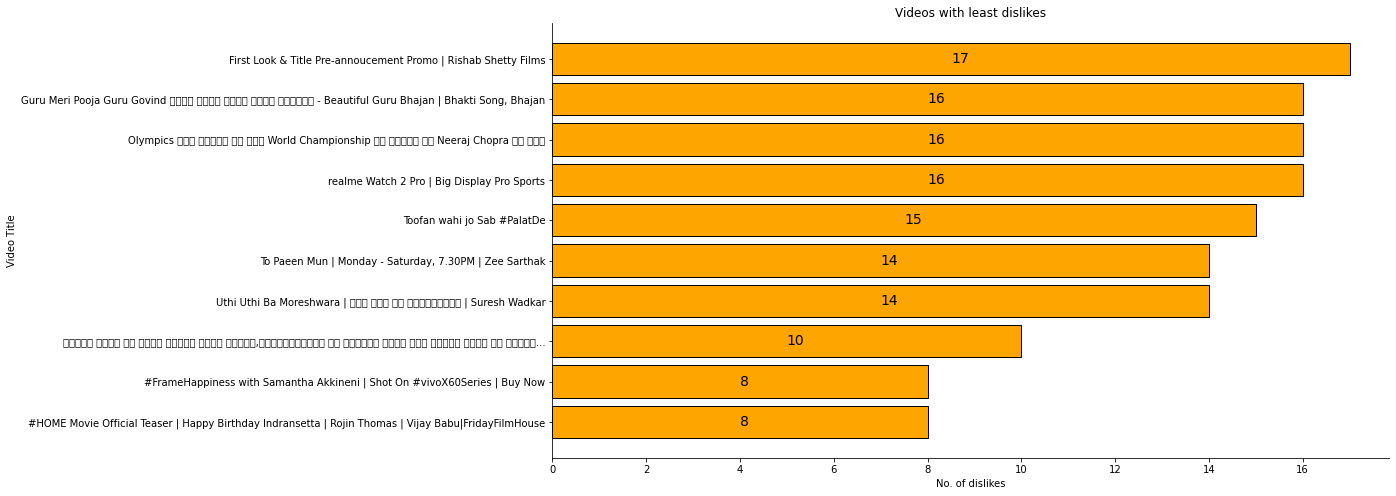

In [43]:
g = min_df.dislikes[min_df.dislikes>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of dislikes", 
             title="Videos with least dislikes",
             figsize=(15,8), barh=True)

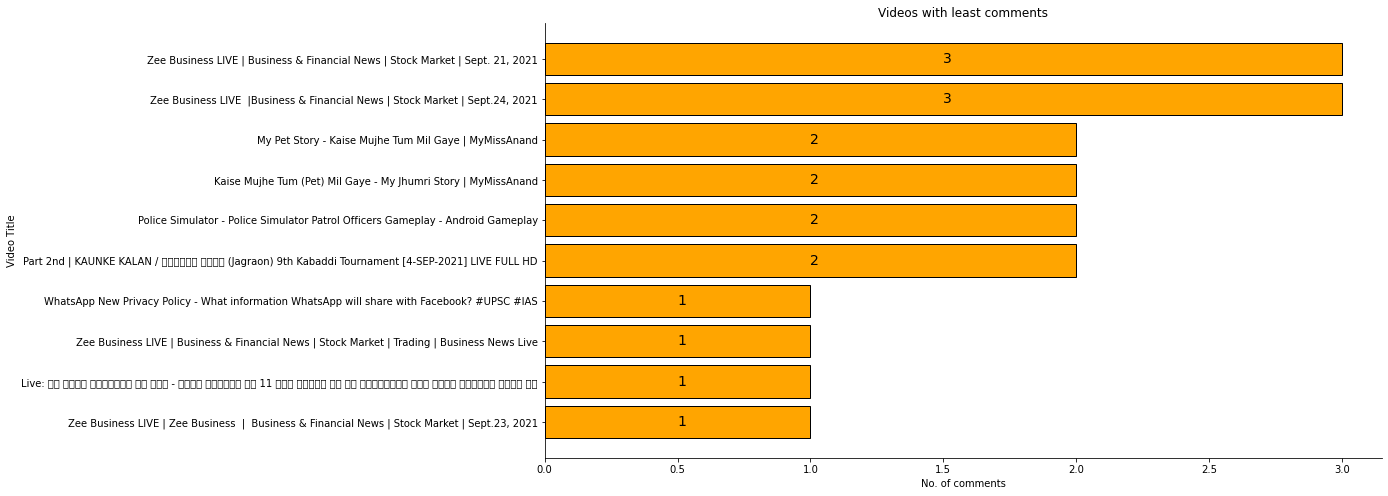

In [44]:
g = min_df.comment_count[min_df.comment_count>0].sort_values()[:10]

plot_barplot(x=g, 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments", 
             title="Videos with least comments",
             figsize=(15,8), barh=True)

### Likes, Dislikes, and Commensts per 1000 views

In [45]:
sub_df['likes_per_1k_views'] = sub_df.likes.divide(sub_df.view_count) * 1000
sub_df['dislikes_per_1k_views'] = sub_df.dislikes.divide(sub_df.view_count) * 1000
sub_df['comments_per_1k_views'] = sub_df.comment_count.divide(sub_df.view_count) * 1000

sub_df.head()

,view_count,likes,dislikes,comment_count,likes_per_1k_views,dislikes_per_1k_views,comments_per_1k_views
title,,,,,,,
20 WEDS 30 | EP1 | Mini Web Series | Comedy | Ponmutta (With English subtitles),509727,16701,506,738,32.764598,0.992688,1.447834
20 WEDS 30 | EP1 | Mini Web Series | Ponmutta (With English subtitles),469751,14511,427,683,30.890834,0.908992,1.453962
20 WEDS 30 | Episode 2 | Mini Web Series | Comedy | Ponmutta (With English subtitles),592280,37411,746,669,63.164382,1.259539,1.129533
#12 | SURPRISED MY SISTER ON HER BIRTHDAY | VIBE WITH SANGWAN,119292,24290,121,399,203.618013,1.014318,3.344734
#13 | ARE YOU SMARTER THAN THIS ADORABLE 4 YEAR OLD GIRL? | VIBE WITH SANGWAN,133762,22160,108,304,165.667379,0.807404,2.272693


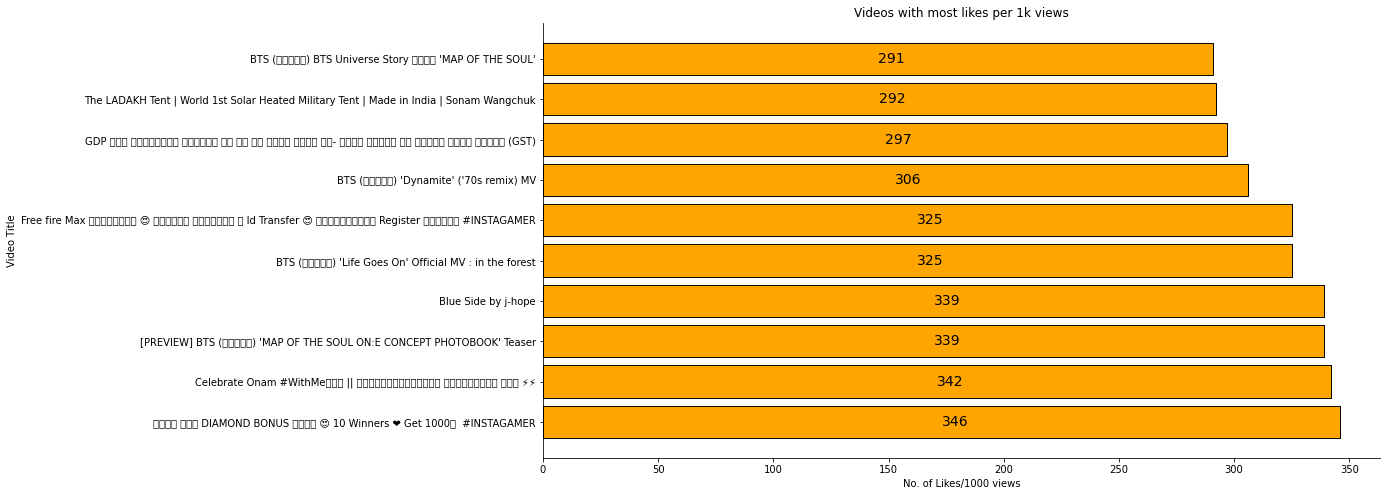

In [46]:
g = sub_df.likes_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Likes/1000 views", 
             title="Videos with most likes per 1k views",
             figsize=(15,8), barh=True)

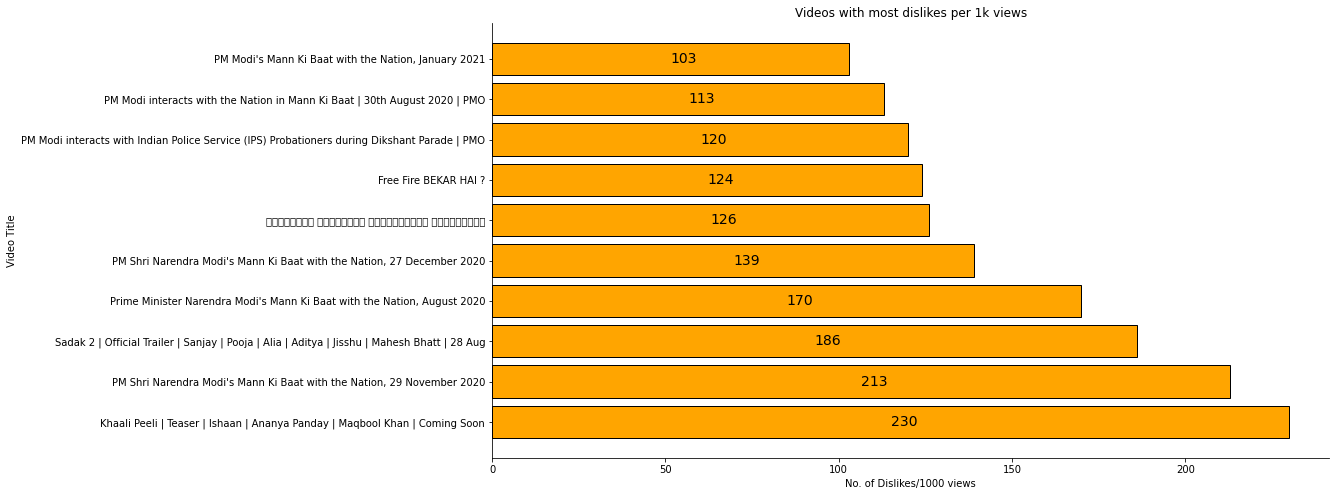

In [47]:
g = sub_df.dislikes_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of Dislikes/1000 views", 
             title="Videos with most dislikes per 1k views",
             figsize=(15,8), barh=True)

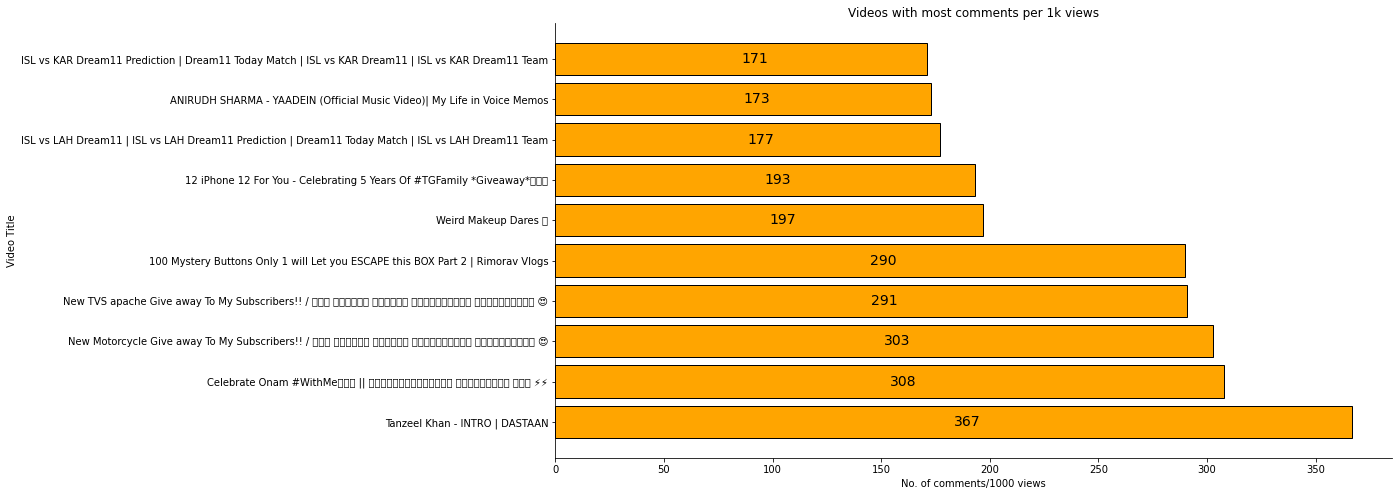

In [48]:
g = sub_df.comments_per_1k_views.sort_values(ascending=False)[:10]

plot_barplot(x=g.astype('int'), 
             y=np.arange(10), 
             yticks=g.index,
             ylabel="Video Title", 
             xlabel="No. of comments/1000 views", 
             title="Videos with most comments per 1k views",
             figsize=(15,8), barh=True)

In [49]:
comment_df = df.groupby('comments_disabled')['title'].unique().to_frame()
comment_df['total'] = comment_df.title.transform(lambda x: len(x))
comment_df['percentage'] = comment_df.total / comment_df.total.sum()*100
comment_df

,title,total,percentage
comments_disabled,,,
False,[Sadak 2 | Official Trailer | Sanjay | Pooja |...,23544,99.145155
True,[FLESH Official Trailer | Eros Now Originals |...,203,0.854845


- **Less than 1% videos on trending page have their comments disabled**

In [50]:
rating_df = df.groupby('ratings_disabled')['title'].unique().to_frame()
rating_df['total'] = rating_df.title.transform(lambda x: len(x))
rating_df['percentage'] = rating_df.total / rating_df.total.sum()*100
rating_df

,title,total,percentage
ratings_disabled,,,
False,[Sadak 2 | Official Trailer | Sanjay | Pooja |...,23557,99.224969
True,[Face To Face With Sarileru Neekevvaru Fight S...,184,0.775031


- **Less than 1% videos on trending page have their ratings disabled**

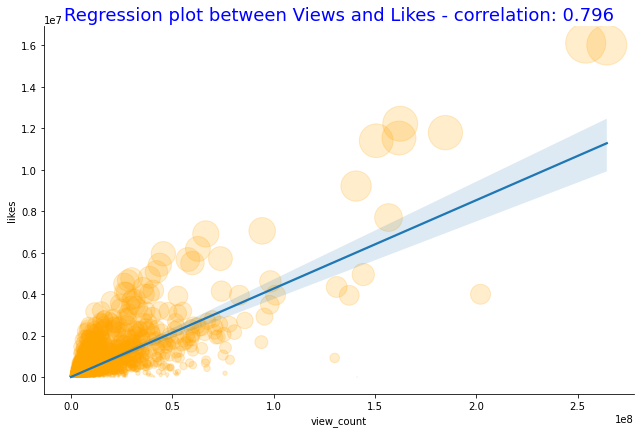

In [51]:
corr = sub_df.likes.corr(sub_df.view_count)

sns.lmplot(data=sub_df, x='view_count', 
           y='likes', 
           scatter_kws={'color':'orange', 'alpha':0.2, 's':sub_df.likes/10000},
           height=6, aspect=1.5)
plt.title(f"Regression plot between Views and Likes - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
plt.show()

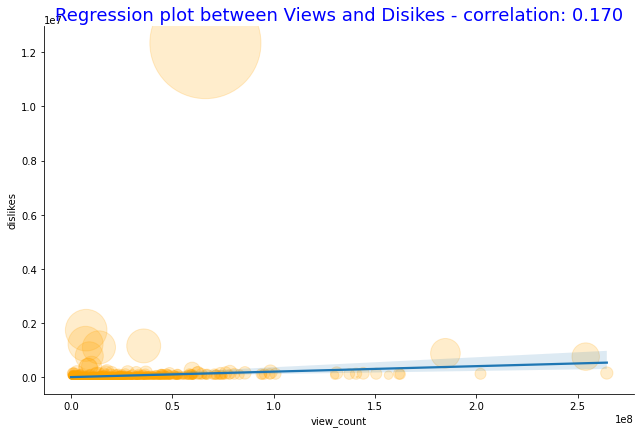

In [52]:
corr = sub_df.dislikes.corr(sub_df.view_count)

sns.lmplot(data=sub_df, x='view_count', 
           y='dislikes', 
           scatter_kws={'color':'orange', 'alpha':0.2, 's':sub_df.dislikes/1000},
           height=6, aspect=1.5)
plt.title(f"Regression plot between Views and Disikes - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
plt.show()

- **Let's remove the outlier**

In [53]:
sub_df = sub_df.sort_values(by='dislikes', ascending=False)

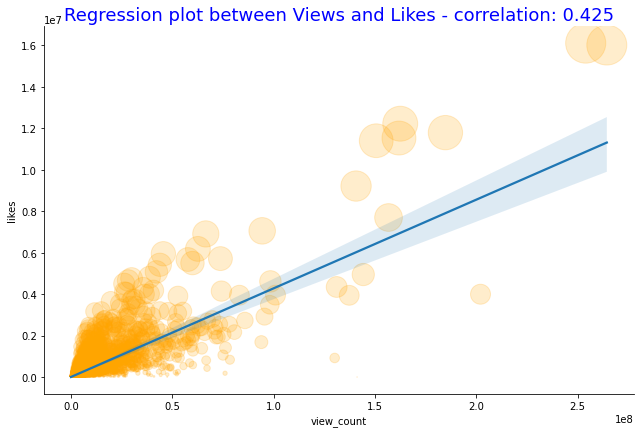

In [54]:
corr = sub_df.dislikes[1:].corr(sub_df.view_count[1:])

sns.lmplot(data=sub_df.iloc[1:], x='view_count', 
           y='likes', 
           scatter_kws={'color':'orange', 'alpha':0.2, 's':sub_df.iloc[1:].likes/10000},
           height=6, aspect=1.5)
plt.title(f"Regression plot between Views and Likes - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
plt.show()

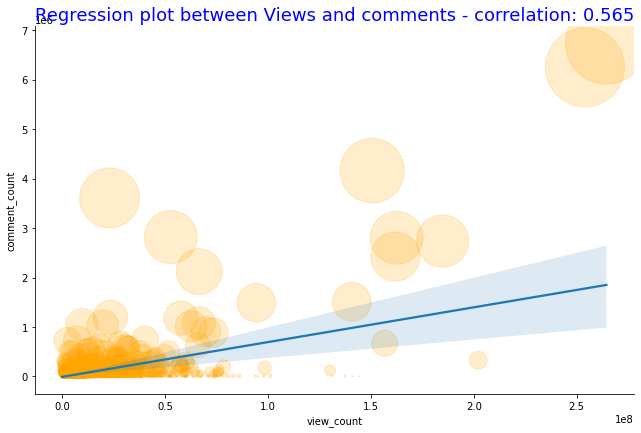

In [55]:
corr = sub_df.comment_count.corr(sub_df.view_count)

sns.lmplot(data=sub_df, x='view_count', 
           y='comment_count', 
           scatter_kws={'color':'orange', 'alpha':0.2, 's':sub_df.comment_count/1000},
           height=6, aspect=1.5)
plt.title(f"Regression plot between Views and comments - correlation: {corr:.3f}", fontdict={'size':18, 'color':'blue'})
plt.show()